In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from dateutil.parser import parse

In [2]:
# archivo = "../../data/fluke_01-07-2021_05-07-2021.csv"
def importa_fluke(archivo):
    tmp = pd.read_csv(archivo,usecols=[7,11],names=["fluke","tiempo"],skiprows=1)
    tmp.tiempo = pd.to_datetime(tmp.tiempo,dayfirst=True)
    tmp.set_index("tiempo",inplace=True)
    tmp.fluke = tmp.fluke.str.replace(" ppm","")
    tmp.fluke = tmp.fluke.astype("float64")
    return tmp


In [4]:
archivo = "../../data/fluke_ventilador_01.csv"
f1 = importa_fluke(archivo)

archivo = "../../data/fluke_ventilador_02.csv"
f2 = importa_fluke(archivo)

archivo = "../../data/fluke_ventilador_03.csv"
f3 = importa_fluke(archivo)

archivo = "../../data/fluke_ventilador_04.csv"
f4 = importa_fluke(archivo)



<AxesSubplot:xlabel='tiempo'>

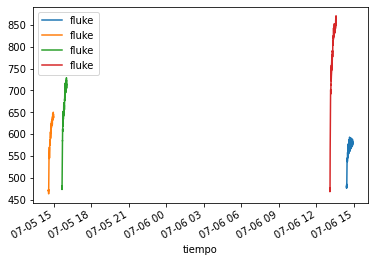

In [5]:
f = pd.concat([f1,f2,f3,f4],axis=1)


In [ ]:
# sensors = pd.read_csv("../../data/sensores_01-07-2021_al_05-07-2021.csv",index_col=0,parse_dates=True)
# # sensores.index = sensores.index + pd.Timedelta("2H")
# sensors = sensors.resample("15S").mean()
# sensors.plot()
# sensors.columns

In [ ]:
datos = pd.concat([sensors,f1],axis=1)
sensores = datos.columns
# datos

In [ ]:
sensores = ['s8lp', 'sen0220', 't3022', 'mh-z14a']
ref = "fluke"
# sensores eliminados 'cjmcu811',  'sen0219', 'cdm4160'
fig, ax = plt.subplots(figsize=(20,4))

# fecha1 = parse("2021-06-30 14:57") 
# fecha2 = fecha1 + pd.Timedelta("40Min")

# ax.set_xlim(fecha1,fecha2)
ax.set_ylim(300,1200)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo [mm-dd H]")
ax.set_title("Mediciones CO2")
ax.plot(datos[ref],"ko",label=ref)
for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor)

ax.legend()
ax.grid()

In [ ]:
cajahermetica = datos.loc["2021-07-01 15:35":"2021-07-02 18:00"]
cajahermetica.plot(figsize=(20,4))

In [ ]:
ambiente = datos.loc["2021-07-02 18:00":"2021-07-05 10:00"]
ambiente.plot(figsize=(20,4))

In [ ]:
cajahermetica.to_csv("../../data/cajahermetica800ppm.csv")
ambiente.to_csv("../../data/ambiente_001_2021-07-02_2021-07-05.csv")
# test600.to_csv("../../data/test600_30-06-2021.csv")
# test700.to_csv("../../data/test700_30-06-2021.csv")
# test900.to_csv("../../data/test900_30-06-2021.csv")